In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# New Section

In [ ]:
#loading the data
data = pd.read_csv('6 danny.csv',sep=';')

In [ ]:
#overview of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1280 non-null   object 
 1   Mes       1280 non-null   int64  
 2   Ano       1280 non-null   int64  
 3   Gen       1280 non-null   float64
 4   subGen    1280 non-null   float64
 5   mmGen     1280 non-null   float64
 6   Exp       1280 non-null   float64
 7   subExp    1280 non-null   float64
 8   mmExp     1280 non-null   float64
 9   PP        1280 non-null   float64
 10  Cond      1280 non-null   object 
 11  Temp min  1280 non-null   int64  
 12  Temp max  1280 non-null   int64  
 13  Temp med  1280 non-null   float64
 14  exp/gen   1280 non-null   float64
dtypes: float64(9), int64(4), object(2)
memory usage: 150.1+ KB


In [ ]:
data.head()

,Date,Mes,Ano,Gen,subGen,mmGen,Exp,subExp,mmExp,PP,Cond,Temp min,Temp max,Temp med,exp/gen
0,01/07/2015,7,2015,20.373,-0.514,20.1160,14.343,-0.857,13.9145,3.876,Fine,12,21,16.5,0.704020
1,02/07/2015,7,2015,19.859,-0.514,22.6195,13.486,5.237,16.1045,4.212,Fine,10,19,14.5,0.679088
2,03/07/2015,7,2015,25.380,5.521,20.2280,18.723,-8.199,14.6235,3.828,Fine,6,19,12.5,0.737707
3,04/07/2015,7,2015,15.076,-10.304,16.6745,10.524,2.683,11.8655,4.260,Partly Cloudy,11,19,15.0,0.698063
4,05/07/2015,7,2015,18.273,3.197,21.5805,13.207,4.351,15.3825,4.464,Fine,9,22,15.5,0.722760


In [ ]:
#statistical analysis of data
data.describe()

,Mes,Ano,Gen,subGen,mmGen,Exp,subExp,mmExp,PP,Temp min,Temp max,Temp med,exp/gen
count,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,6.408594,2017.007812,21.841244,0.019780,21.814320,17.292781,-0.048539,17.267730,4.066078,17.176562,25.373438,21.275000,0.765462
std,3.492794,1.249213,6.618402,7.272447,5.571707,6.936380,7.097279,5.975617,0.700135,4.654447,3.701900,3.935385,0.191771
min,1.000000,2015.000000,0.051000,-23.464000,3.350500,0.010000,-23.072000,0.567000,0.120000,3.000000,16.000000,11.000000,0.005659
25%,3.000000,2016.000000,18.267500,-3.478000,18.252500,13.020250,-4.005750,13.239250,3.840000,14.000000,22.000000,18.000000,0.676440
50%,6.000000,2017.000000,23.291000,-0.091000,22.641250,18.387500,-0.104000,17.587500,4.188000,18.000000,26.000000,21.500000,0.771867
75%,9.000000,2018.000000,26.887750,3.459000,26.121125,22.574000,3.742500,21.329750,4.500000,21.000000,28.000000,24.500000,0.975793
max,12.000000,2019.000000,31.889000,27.246000,31.620000,30.538000,24.024000,30.378500,5.004000,28.000000,51.000000,31.000000,1.000000


## EXPLORATORY DATA ANALYSIS:

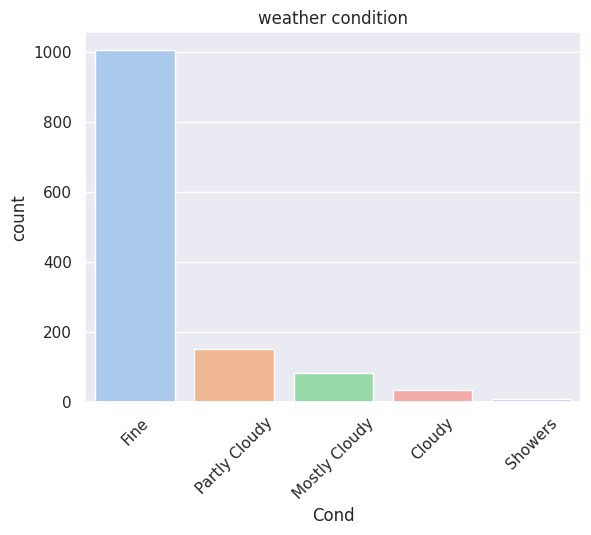

In [ ]:
#count plot for weather condition
sns.countplot(x='Cond',data=data)
plt.title('weather condition')
plt.xticks(rotation=45)
plt.show()

Majority of the samples are Fine weather condition based samples.
Least number of samples are showers data.


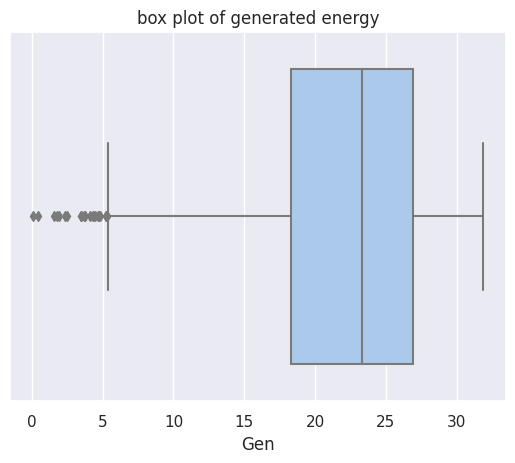

In [ ]:
#distribution of genrated energy
sns.set_theme( palette="pastel")
sns.boxplot(x=data['Gen'])
plt.title('box plot of generated energy')
plt.show()

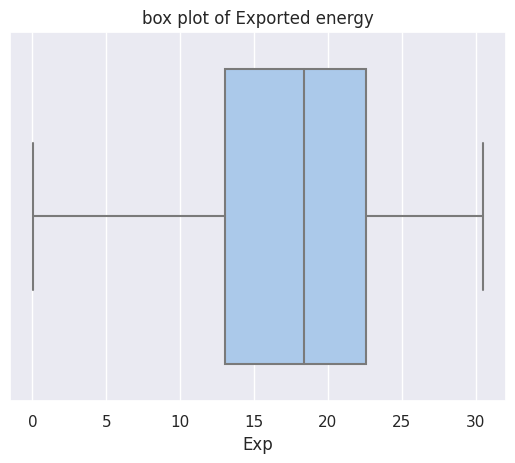

In [ ]:
#distribution of exported energy
sns.set_theme( palette="pastel")
sns.boxplot(x=data['Exp'])
plt.title('box plot of Exported energy')
plt.show()

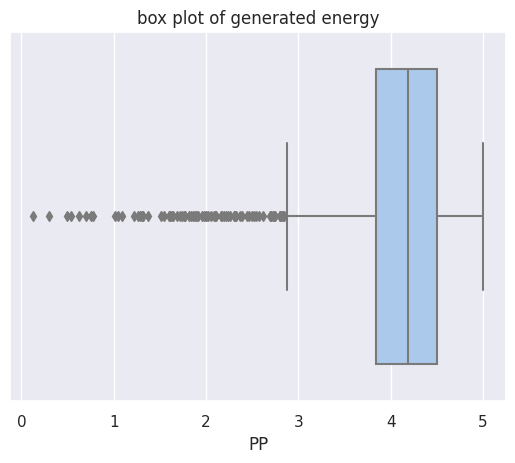

In [ ]:
#distribution of Peak Power
sns.set_theme( palette="pastel")
sns.boxplot(x=data['PP'])
plt.title('box plot of PP')
plt.show()

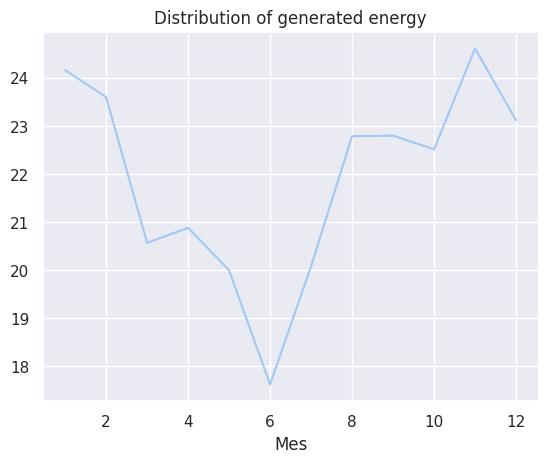

In [ ]:
#monthly distribution of generated energy
gen_data=data.groupby('Mes').mean()['Gen']
gen_data.plot(kind='line')
plt.title('Distribution of generated energy')
plt.show()


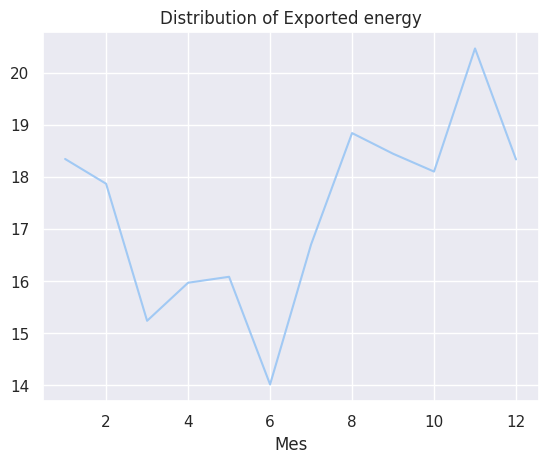

In [ ]:
##monthly distribution of Exported energy
gen_data=data.groupby('Mes').mean()['Exp']
gen_data.plot(kind='line')
plt.title('Distribution of Exported energy')
plt.show()

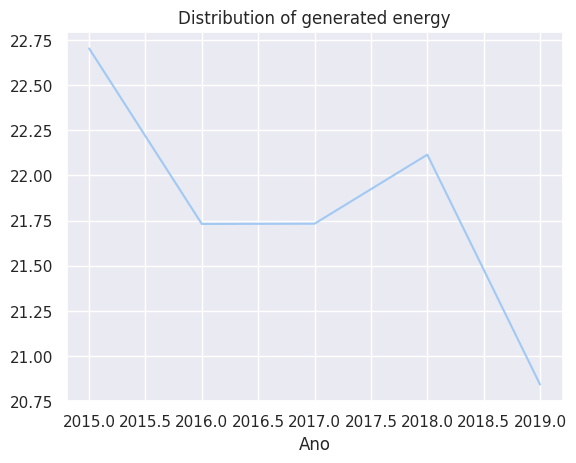

In [ ]:
#Yearly distribution of generated energy
gen_data=data.groupby('Ano').mean()['Gen']
gen_data.plot(kind='line')
plt.title('Distribution of generated energy')
plt.show()

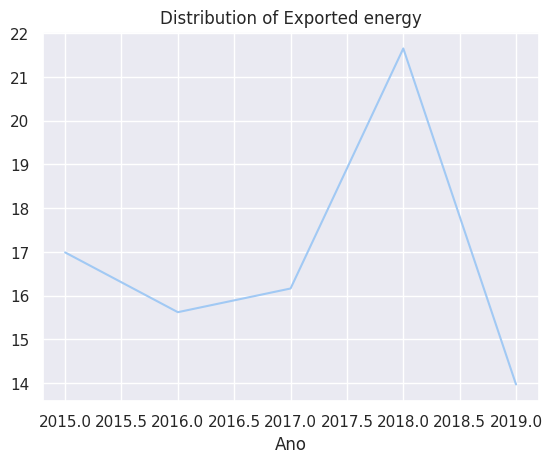

In [ ]:
#Yearly distribution of generated energy
gen_data=data.groupby('Ano').mean()['Exp']
gen_data.plot(kind='line')
plt.title('Distribution of Exported energy')
plt.show()

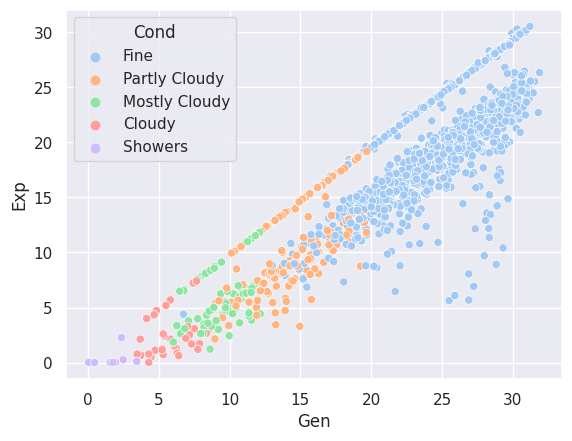

In [ ]:
sns.scatterplot(data=data,x='Gen',y='Exp',hue='Cond')
plt.show()

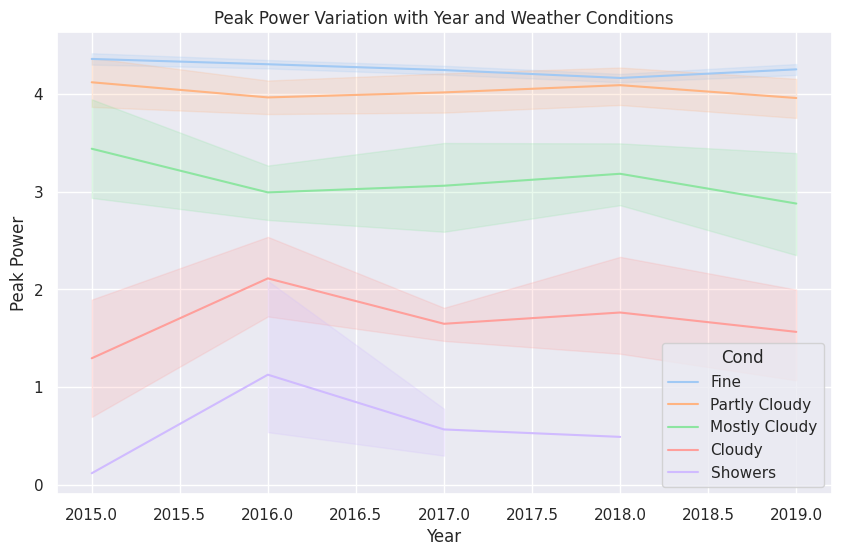

In [ ]:

# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting line plot with hue encoding weather conditions
sns.lineplot(data=data, x='Ano', y='PP', hue='Cond')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Peak Power')
plt.title('Peak Power Variation with Year and Weather Conditions')

# Display the plot
plt.show()


The ratio of generated vs exported is high for Fine weather condition and it is   poor for showers weather condition

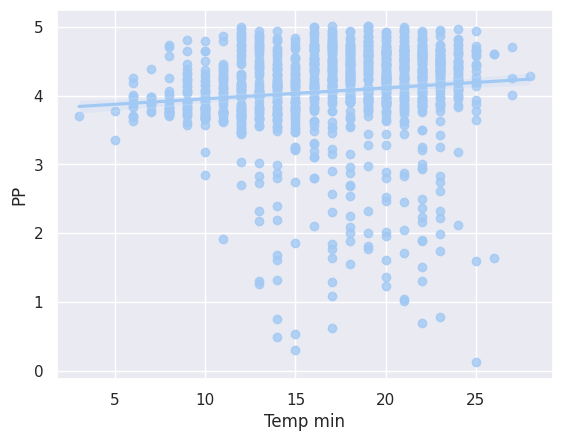

In [ ]:
#relation with peakpower to the temperature
sns.regplot(x = "Temp min",
            y = "PP",
            data = data)
plt.show()


There is a positive correlation between peakpower and temperature minimum
There are high amount of outliers in the data

Examining correlation

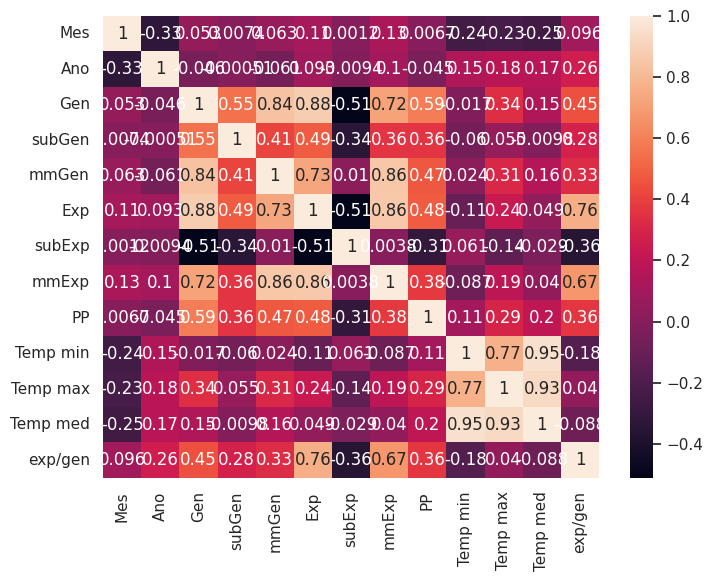

In [ ]:
#correlation matrix
data_corr = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(data_corr,annot=True)
plt.show()

In [ ]:
# Set the threshold for strong correlation
threshold = 0.8

# Find strongly correlated pairs
strong_corr_pairs = []
for i in range(len(data_corr.columns)):
    for j in range(i+1, len(data_corr.columns)):
        if abs(data_corr.iloc[i, j]) > threshold:
            strong_corr_pairs.append((data_corr.columns[i], data_corr.columns[j], data_corr.iloc[i, j]))

# Print the strongly correlated pairs
for pair in strong_corr_pairs:
    print(f"{pair[0]} - {pair[1]} : {pair[2]}")

Gen - mmGen : 0.8365228386999326
Gen - Exp : 0.8806092034431497
mmGen - mmExp : 0.8555483263629033
Exp - mmExp : 0.8593831680011463
Temp min - Temp med : 0.954150238776579
Temp max - Temp med : 0.9264779188590769


The following pairs have strongly correlated features

## Data cleaning

In [ ]:
#dropping the unnecessary columns
data.drop(['Date','Ano','Mes'],axis=1,inplace=True)

In [ ]:
data.isnull().sum()

Gen         0
subGen      0
mmGen       0
Exp         0
subExp      0
mmExp       0
PP          0
Cond        0
Temp min    0
Temp max    0
Temp med    0
exp/gen     0
dtype: int64

## Data preprocessing

In [ ]:
#encoding the categorical columns
le=preprocessing.LabelEncoder()
data['Cond'] = le.fit_transform(data['Cond'])


In [ ]:
#seperating the features and targets
X_gen = data.drop('Gen',axis=1)  #generated energy features
y_gen = data['Gen']              #generated energy targets

X_exp = data.drop('Exp',axis=1)  #exported energy features
y_exp = data['Exp']              #exported energy targets


#splitting the data
X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(X_gen,y_gen,test_size=0.2)

X_train_exp, X_test_exp, y_train_exp, y_test_exp  = train_test_split(X_exp,y_exp,test_size=0.2)



## Enemble models

In [ ]:
base_models = [
    ('KNN', KNeighborsRegressor()),
    ('SVR',SVR()),
    ('Random Forest',RandomForestRegressor()),
    ('Linear Regression',LinearRegression())
    ]
stacked = StackingRegressor(
    estimators = base_models,
    final_estimator = Lasso(),
    cv = 10)

-------KNN-------
Coefficient of determination: 0.9524019890235159
Root Mean Squared Error: 1.4478227869265459
Mean Squared Error: 2.0961908223437504
Mean Absolute Error: 1.1205554687500001
Mean Absolute Percentage Error: 0.10491816367664929
----------------------------------

-------SVR-------
Coefficient of determination: 0.9733369790916403
Root Mean Squared Error: 1.0836166808601075
Mean Squared Error: 1.1742251110382762
Mean Absolute Error: 0.7481915464428075
Mean Absolute Percentage Error: 0.09406996441083834
----------------------------------

-------Random Forest-------
Coefficient of determination: 0.9768856998151381
Root Mean Squared Error: 1.0089307992121304
Mean Squared Error: 1.0179413575988283
Mean Absolute Error: 0.5627130078124993
Mean Absolute Percentage Error: 0.049053581132376955
----------------------------------

-------Linear Regression-------
Coefficient of determination: 0.9799068178299158
Root Mean Squared Error: 0.9406874847135801
Mean Squared Error: 0.88489294

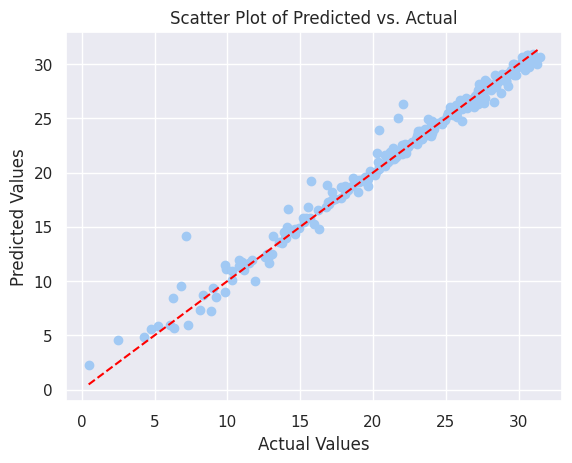

In [ ]:
#generated energy
for name, model in base_models:
    model.fit(X_train_gen, y_train_gen)
    prediction = model.predict(X_test_gen)

    r2 = model.score(X_test_gen, y_test_gen)
    rmse = mean_squared_error(y_test_gen, prediction, squared = False)
    mse = mean_squared_error(y_test_gen, prediction)
    mae = mean_absolute_error(y_test_gen, prediction)
    mape = mean_absolute_percentage_error(y_test_gen, prediction)

    print("-------{}-------".format(name))
    print("Coefficient of determination: {}".format(r2))
    print("Root Mean Squared Error: {}".format(rmse))
    print("Mean Squared Error: {}".format(mse))
    print("Mean Absolute Error: {}".format(mae))
    print("Mean Absolute Percentage Error: {}".format(mape))
    print("----------------------------------\n")

stacked.fit(X_train_gen, y_train_gen)
stacked_prediction = stacked.predict(X_test_gen)
stacked_r2 = stacked.score(X_test_gen, y_test_gen)
stacked_rmse = mean_squared_error(y_test_gen, stacked_prediction, squared = False)
stacked_mse = mean_squared_error(y_test_gen, stacked_prediction)
stacked_mae = mean_absolute_error(y_test_gen, stacked_prediction)
stacked_mape = mean_absolute_percentage_error(y_test_gen, stacked_prediction)

print("-------Stacked Ensemble-------")
print("Coefficient of determination: {}".format(stacked_r2))
print("Root Mean Squared Error: {}".format(stacked_rmse))
print("Mean Squared Error: {}".format(stacked_mse))
print("Mean Absolute Error: {}".format(stacked_mae))
print("Mean Absolute Percentage Error: {}".format(stacked_mape))

print("----------------------------------")


# Create a scatter plot
plt.scatter(y_test_gen, stacked_prediction)

# Set plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual')

# Add a diagonal line for reference
plt.plot([min(y_test_gen), max(y_test_gen)], [min(y_test_gen), max(y_test_gen)], color='red', linestyle='--')

# Display the plot
plt.show()

-------KNN-------
Coefficient of determination: 0.9645048593734656
Root Mean Squared Error: 1.3749720695458691
Mean Squared Error: 1.8905481920312506
Mean Absolute Error: 1.0711570312499998
Mean Absolute Percentage Error: 0.44106654717709126
----------------------------------

-------SVR-------
Coefficient of determination: 0.9948552845046728
Root Mean Squared Error: 0.5234679628182111
Mean Squared Error: 0.27401870809704804
Mean Absolute Error: 0.30740129624831225
Mean Absolute Percentage Error: 1.4432263510223564
----------------------------------

-------Random Forest-------
Coefficient of determination: 0.9984179367264334
Root Mean Squared Error: 0.29028283111179914
Mean Squared Error: 0.08426412203828132
Mean Absolute Error: 0.1908890624999999
Mean Absolute Percentage Error: 0.07631114128427165
----------------------------------

-------Linear Regression-------
Coefficient of determination: 0.9999990229923107
Root Mean Squared Error: 0.00721370563777253
Mean Squared Error: 5.20375

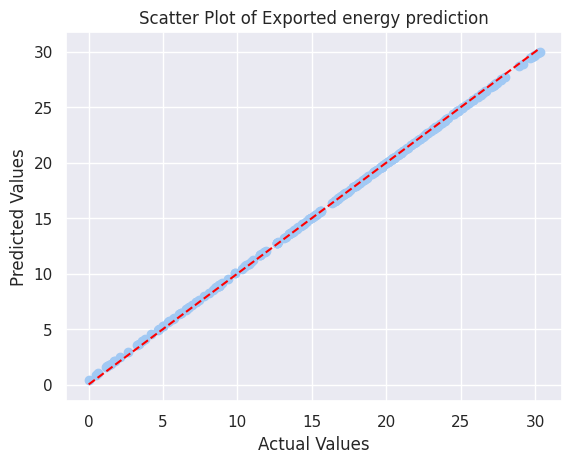

In [ ]:

#exported energy
for name, model in base_models:
    model.fit(X_train_exp, y_train_exp)
    prediction = model.predict(X_test_exp)

    r2 = model.score(X_test_exp, y_test_exp)
    rmse = mean_squared_error(y_test_exp, prediction, squared = False)
    mse = mean_squared_error(y_test_exp, prediction)
    mae = mean_absolute_error(y_test_exp, prediction)
    mape = mean_absolute_percentage_error(y_test_exp, prediction)

    print("-------{}-------".format(name))
    print("Coefficient of determination: {}".format(r2))
    print("Root Mean Squared Error: {}".format(rmse))
    print("Mean Squared Error: {}".format(mse))
    print("Mean Absolute Error: {}".format(mae))
    print("Mean Absolute Percentage Error: {}".format(mape))
    print("----------------------------------\n")

stacked.fit(X_train_exp, y_train_exp)
stacked_prediction = stacked.predict(X_test_exp)
stacked_r2 = stacked.score(X_test_exp, y_test_exp)
stacked_rmse = mean_squared_error(y_test_exp, stacked_prediction, squared = False)
stacked_mse = mean_squared_error(y_test_exp, stacked_prediction)
stacked_mae = mean_absolute_error(y_test_exp, stacked_prediction)
stacked_mape = mean_absolute_percentage_error(y_test_exp, stacked_prediction)

print("-------Stacked Ensemble-------")
print("Coefficient of determination: {}".format(stacked_r2))
print("Root Mean Squared Error: {}".format(stacked_rmse))
print("Mean Squared Error: {}".format(stacked_mse))
print("Mean Absolute Error: {}".format(stacked_mae))
print("Mean Absolute Percentage Error: {}".format(stacked_mape))

print("----------------------------------")


# Create a scatter plot
plt.scatter(y_test_exp, stacked_prediction)

# Set plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Exported energy prediction')

# Add a diagonal line for reference
plt.plot([min(y_test_exp), max(y_test_exp)], [min(y_test_exp), max(y_test_exp)], color='red', linestyle='--')

# Display the plot
plt.show()

Bagging methods

In [ ]:
#bagging regressor for generated energy
bagging_reg = BaggingRegressor(estimator= RandomForestRegressor(), n_estimators=10, random_state=0)
bagging_reg.fit(X_train_gen, y_train_gen)
bagregressor_pred = bagging_reg.predict(X_test_gen)


In [ ]:

r2 = bagging_reg.score(X_test_gen, y_test_gen)
rmse = mean_squared_error(y_test_gen, bagregressor_pred, squared = False)
mse = mean_squared_error(y_test_gen, bagregressor_pred)
mae = mean_absolute_error(y_test_gen, bagregressor_pred)
mape = mean_absolute_percentage_error(y_test_gen, bagregressor_pred)

print("-------Stacked Ensemble-------")
print("Coefficient of determination: {}".format(r2))
print("Root Mean Squared Error: {}".format(rmse))
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Mean Absolute Percentage Error: {}".format(mape))

print("----------------------------------")


-------Stacked Ensemble-------
Coefficient of determination: 0.9821747100692596
Root Mean Squared Error: 0.8860113930031501
Mean Squared Error: 0.7850161885313826
Mean Absolute Error: 0.5623804609374998
Mean Absolute Percentage Error: 0.053741843460580564
----------------------------------


In [ ]:
#bagging regressor for exported energy
bagging_reg = BaggingRegressor(estimator= RandomForestRegressor(), n_estimators=10, random_state=0)
bagging_reg.fit(X_train_exp, y_train_exp)
bagregressor_pred = bagging_reg.predict(X_test_exp)

In [ ]:
r2 = bagging_reg.score(X_test_exp, y_test_exp)
rmse = mean_squared_error(y_test_exp, bagregressor_pred, squared = False)
mse = mean_squared_error(y_test_exp, bagregressor_pred)
mae = mean_absolute_error(y_test_exp, bagregressor_pred)
mape = mean_absolute_percentage_error(y_test_exp, bagregressor_pred)

In [ ]:
print("-------Bagging regressor-------")
print("Coefficient of determination: {}".format(r2))
print("Root Mean Squared Error: {}".format(rmse))
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Mean Absolute Percentage Error: {}".format(mape))

print("----------------------------------")

-------Stacked Ensemble-------
Coefficient of determination: 0.9961376413542942
Root Mean Squared Error: 0.4278139752849565
Mean Squared Error: 0.18302479744911737
Mean Absolute Error: 0.2575441484375003
Mean Absolute Percentage Error: 0.16193719017250663
----------------------------------


Boosting methods

In [ ]:
#gradient boosting regressor for generated energy
grad_reg = GradientBoostingRegressor(random_state=0)
grad_reg.fit(X_train_gen, y_train_gen)

#preditions
grad_pred =  grad_reg.predict(X_test_gen)


In [ ]:
r2 = grad_reg.score(X_test_gen, y_test_gen)
rmse = mean_squared_error(y_test_gen, grad_pred, squared = False)
mse = mean_squared_error(y_test_gen, grad_pred)
mae = mean_absolute_error(y_test_gen, grad_pred)
mape = mean_absolute_percentage_error(y_test_gen, grad_pred)

print("-------{}-------".format(name))
print("Coefficient of determination: {}".format(r2))
print("Root Mean Squared Error: {}".format(rmse))
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Mean Absolute Percentage Error: {}".format(mape))
print("----------------------------------\n")

-------Linear Regression-------
Coefficient of determination: 0.9785145442250558
Root Mean Squared Error: 0.9484679565573991
Mean Squared Error: 0.8995914646161685
Mean Absolute Error: 0.6973757723168619
Mean Absolute Percentage Error: 0.039305616565932865
----------------------------------



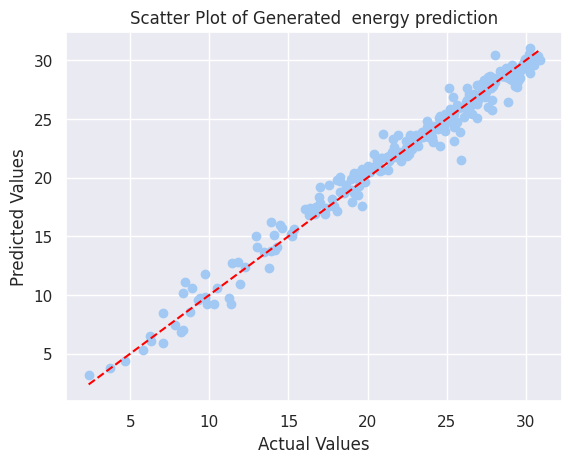

In [ ]:
# Create a scatter plot
plt.scatter(y_test_gen, grad_pred)

# Set plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Generated  energy prediction')

# Add a diagonal line for reference
plt.plot([min(y_test_gen), max(y_test_gen)], [min(y_test_gen), max(y_test_gen)], color='red', linestyle='--')

# Display the plot
plt.show()

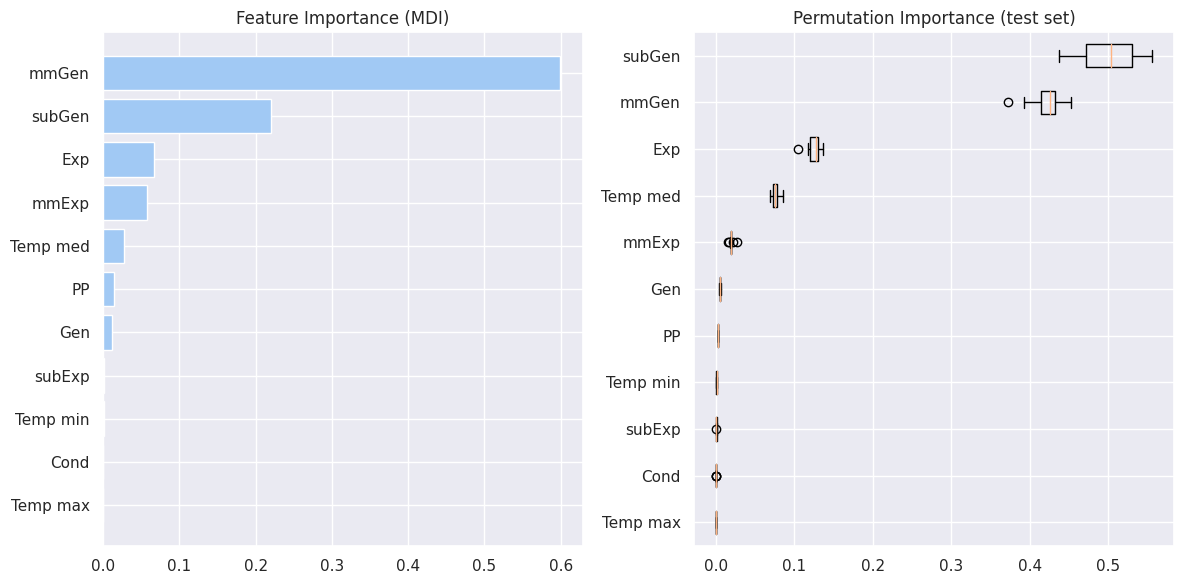

In [ ]:

from sklearn.inspection import permutation_importance
feature_importance = grad_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(data.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    grad_reg, X_test_gen, y_test_gen, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(data.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [ ]:
grad_reg.fit(X_train_exp,y_train_exp)
grad_pred_2 = grad_reg.predict(X_test_exp)

In [ ]:
r2 = grad_reg.score(X_test_exp, y_test_exp)
rmse = mean_squared_error(y_test_exp, grad_pred_2, squared = False)
mse = mean_squared_error(y_test_exp, grad_pred_2)
mae = mean_absolute_error(y_test_exp, grad_pred_2)
mape = mean_absolute_percentage_error(y_test_exp, grad_pred_2)

In [ ]:
print("-------{}-------".format(name))
print("Coefficient of determination: {}".format(r2))
print("Root Mean Squared Error: {}".format(rmse))
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Mean Absolute Percentage Error: {}".format(mape))
print("----------------------------------\n")

-------Linear Regression-------
Coefficient of determination: 0.9963527895566928
Root Mean Squared Error: 0.41572781201466436
Mean Squared Error: 0.1728296136825001
Mean Absolute Error: 0.2938016120712025
Mean Absolute Percentage Error: 0.0615491808492095
----------------------------------



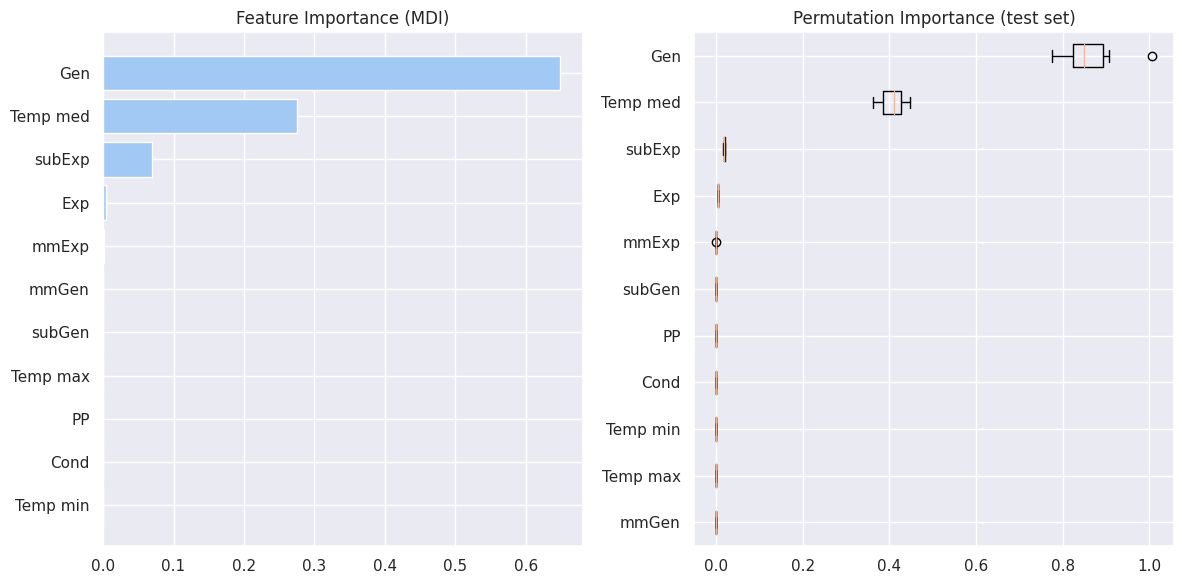

In [ ]:
from sklearn.inspection import permutation_importance
feature_importance = grad_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(data.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    grad_reg, X_test_exp, y_test_exp, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(data.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()